In [12]:
import astropy.units as u
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import Angle, Longitude, Latitude, SkyCoord
from cdshealpix import lonlat_to_healpix
from mocpy import MOC, WCS

In [40]:
nside = 64
resolution_arcmin = hp.nside2resol(nside, arcmin=True)

df = pd.read_parquet('data/stars.parquet', columns=['ps1_ra', 'ps1_dec', 'des_ra', 'des_dec'])
ra = np.where(df['ps1_ra'].isnull(), df['des_ra'], df['ps1_ra'])
dec = np.where(df['ps1_dec'].isnull(), df['des_dec'], df['ps1_dec'])
healpix = hp.ang2pix(nside, ra, dec, lonlat=True)
pix, counts = np.unique(healpix, return_counts=True)
pix_map = np.zeros(hp.nside2npix(nside), dtype=int)
pix_map[pix] = counts
print(pix.shape, counts.max(), counts.mean(), np.median(counts))

(24126,) 32451 2288.8634667993038 1465.0


/var/folders/w1/lh3h4s7d5g10rdlfj4h0mshw0000gn/T/ipykernel_91171/3901410438.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(pix_map),
/Users/hombit/.virtualenvs/calibration/lib/python3.11/site-packages/healpy/projaxes.py:951: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = matplotlib.cm.get_cmap(cmap)


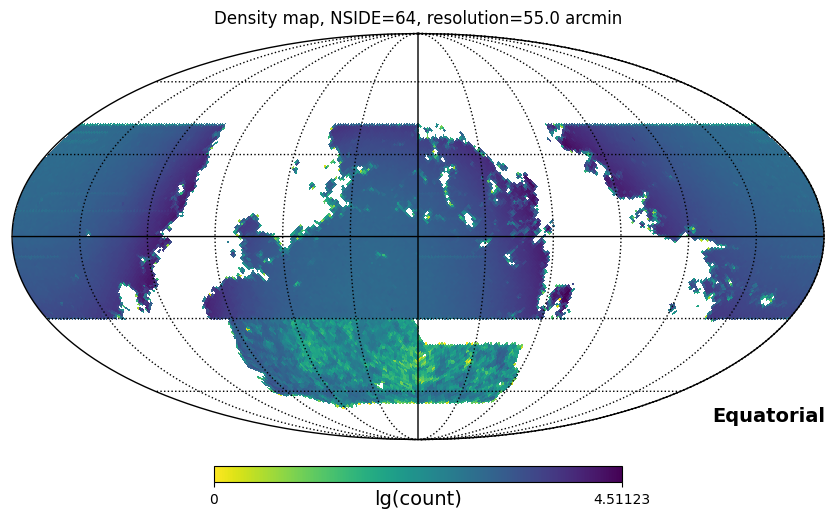

In [49]:
hp.mollview(
    np.log10(pix_map),
    title=f"Density map, NSIDE={nside}, resolution={resolution_arcmin:.1f} arcmin",
    cmap='viridis_r',
    bgcolor='white',
    unit='lg(count)',
    coord='C',
    flip='astro',
)
hp.graticule()